In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] =8,6
%matplotlib inline
import os
os.chdir('C:\\College\\Machine Learnings\\Part 9 - Dimensionality Reduction\\Section 43 - Principal Component Analysis (PCA)')
import warnings
warnings.filterwarnings('ignore')

In [2]:
wines_dataset=pd.read_csv("Wine.csv")

In [3]:
columns=wines_dataset.columns

In [4]:
###Missing values ####
null_checking=[]
for data in columns:
    null_checking.append(wines_dataset[wines_dataset[data].isna()])

In [5]:
null_checking 
### All Dataframes are empty so no null or missing values 


[Empty DataFrame
 Columns: [Alcohol, Malic_Acid, Ash, Ash_Alcanity, Magnesium, Total_Phenols, Flavanoids, Nonflavanoid_Phenols, Proanthocyanins, Color_Intensity, Hue, OD280, Proline, Customer_Segment]
 Index: [], Empty DataFrame
 Columns: [Alcohol, Malic_Acid, Ash, Ash_Alcanity, Magnesium, Total_Phenols, Flavanoids, Nonflavanoid_Phenols, Proanthocyanins, Color_Intensity, Hue, OD280, Proline, Customer_Segment]
 Index: [], Empty DataFrame
 Columns: [Alcohol, Malic_Acid, Ash, Ash_Alcanity, Magnesium, Total_Phenols, Flavanoids, Nonflavanoid_Phenols, Proanthocyanins, Color_Intensity, Hue, OD280, Proline, Customer_Segment]
 Index: [], Empty DataFrame
 Columns: [Alcohol, Malic_Acid, Ash, Ash_Alcanity, Magnesium, Total_Phenols, Flavanoids, Nonflavanoid_Phenols, Proanthocyanins, Color_Intensity, Hue, OD280, Proline, Customer_Segment]
 Index: [], Empty DataFrame
 Columns: [Alcohol, Malic_Acid, Ash, Ash_Alcanity, Magnesium, Total_Phenols, Flavanoids, Nonflavanoid_Phenols, Proanthocyanins, Color_I

In [6]:
### check categorical variables in dataset
wines_dataset.info()
### wines_dataset doesnt have any categorical variables 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [7]:
#### Convert it into arrays
len(wines_dataset.columns)
X=wines_dataset.iloc[:,0:13].values
Y=wines_dataset.iloc[:,len(wines_dataset.columns)-1:].values

In [8]:
### Train test split #################
import sklearn
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


C:\Users\PuneetPC\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
### feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y=StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)


In [77]:
### Check wheteher dataset is linear or non-linearusing Kernel SVM
from sklearn.svm import SVC
svc=SVC()
svc=svc.fit(X_train,Y_train)
from sklearn.model_selection import GridSearchCV
param={'kernel':['rbf','linear']}
grid=GridSearchCV(svc,param_grid=param)
grid.fit(X_train,Y_train)
grid.best_params_
### From GridSearch we can know that data is linear So any Linear classifier algorithm should be used. 
### So for this classification I am using logistic regressor which is Linear classifier. 

{'kernel': 'linear'}

In [10]:
### PCA Applying ####################
### Viewing Explained Variance from all the columns ##################
from sklearn.decomposition import PCA
### pca = PCA(n_component=None) 
### this gives all the details about all the components of the dataset and their variance estimate
pca=PCA(n_components=2)
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)
explained_variance=pca.explained_variance_ratio_


In [11]:
explained_variance

### so from this we can see that first 2 components explain 56 of variance from the dependent dataset which is good measure.

array([ 0.35952175,  0.19820577])

In [36]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state=0)
log_classifier.fit(X_train,Y_train)
y_pred=log_classifier.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
conf_train=confusion_matrix(Y_train,log_classifier.predict(X_train))

In [19]:
conf_train

array([[43,  2,  0],
       [ 2, 52,  1],
       [ 0,  0, 42]], dtype=int64)

In [23]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(log_classifier,X_train,Y_train,scoring='accuracy',cv=15,n_jobs=-1)

In [24]:
accuracy.mean()

0.97259259259259256

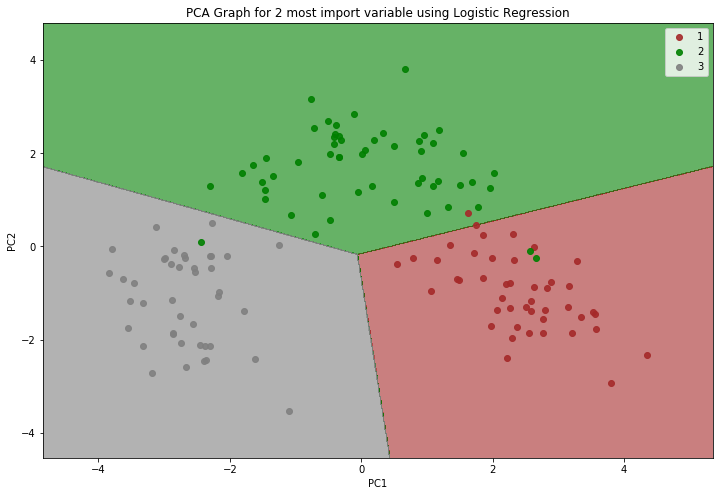

In [61]:
from matplotlib.colors import ListedColormap
X_set,Y_set=X_train,Y_train.ravel()
X1,X2= np.meshgrid(np.arange(X_set[:,0].min()-1,X_set[:,0].max()+1,0.01),
                   np.arange(X_set[:,1].min()-1,X_set[:,1].max()+1,0.01))
plt.contourf(X1,X2,log_classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),cmap= ListedColormap(('brown','green','grey')),alpha=0.6)
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j,0],X_set[Y_set==j,1],c=ListedColormap(('brown','green','grey'))(i),label=j,alpha=0.9)
plt.legend()   
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Graph for 2 most import variable using Logistic Regression')
plt.rcParams['figure.figsize'] =12,8
plt.show()